# Module 04: Model Development

<details><summary style='font-size:22px'>Learning Objectives:</summary>

- Simple and multiple **Linear Regression**.
- Model Evaluation using **Visualization**.
- **Polynomial Regression** and **Pipelines**.
- **R-squared** and **MSE** for in-Sample Evaluation
- Prediction and Decision Makeing.
</details>

**Question**:
+ How can you determine a fair value for a used car?

### Model Development
---
> A model can be thought of as a mathematical equation used to predict a value given one or more other values.

- **Senario No.01**: 
    + Relating <u>one or more independent variables</u> to <u>dependent variables</u>.
<center>
    <img src='modules_images/modelDev01.png',  style='width: 750px;'>
</center>

- **Senario No.02**:
    + With more <u>relevent data</u> you have the more accurate your model is.
<center>
    <img src='modules_images/modelDev02.png',  style='width: 750px;'>
</center>

- **Senario No.03**:
    Depending on your data, the prices (target) will be effected.
    + If you've two almost identical cars.
    + *Pink cars* sell for significantly less.
<center>
    <img src='modules_images/ModelDev03.png',  style='width: 750px;'>
</center>

In addition to getting more data you can try different types of models.

*In this module, you will learn about:*
- Simple Linear Regression.
- Multiple Linear Regression.
- Polynomial Regression.

---

### (A) Linear Regression & Multiple Linear Regression
---

Before we getting started, I want to reminds you of how you can calculate the **slope** and the **intercept** of linear regression (linear function for fitting)
<center>
    <img src='modules_images/calculateLinearRegression.png' width='1200px'>
</center>

<img src='modules_images/linear_regression_calculation.jpg' style='width:750px; float:right'>
<br>

- Linear regression will refer to:

    + **Independent Variable** (x<sub>1</sub>)---Linear regression---> **Prediction**
    
    + **Multiple Independent Variable** (x<sub>1</sub>, ... x<sub>d</sub>) ---Multiple Linear regression---> **Prediction**

#### A. Simple Linear Regression
1. **Predictor** (independent) variable - _x_
2. **Target** (dependent) variable - _y_

   **y = $\beta$<sub>0</sub> + $\beta$<sub>1</sub>_x_**

- $\beta$<sub>0</sub>: **The intercept**
- $\beta$<sub>1</sub>: **The slope**
<br><br><br><br><br><br><br><br><br><br>
<img src='modules_images/SLR_Prediction.png' style='width:750px; float:right'>

**Simple Linear Regression: <u>Fit</u>**
- These are the <span style='color:red'>Red</span> points on the <u>Slope</u> --> (_x_ points)
- We're using this training points to _fit_ our model.
- The result of the training points are the parameters (b<sub>0</sub> (Intercept), b<sub>1</sub>(Slope))
- we're usually store the data points in **dataFrame** or **NumPy array** --> (data stored are the independent varaiable in the dataframe or array _x_)

**How Simple Linear Regression Works**
- we have set of training points.
- We use these training points to **Fit** or **train** the model to get parameters (b<sub>0</sub>, b<sub>1</sub>).
- Then use thses parameters in the model. We now have a **model**. $\hat{Y}$ = b<sub>0</sub> + b<sub>1</sub> _x_

In [ ]:
# First, we need to install scikit-learn library:
!pip install sklearn

##### Fitting a Simple Linear Model Estimator
- X: Predictor variable
- Y: Target variable

    1. Import *Linear_model* from **Scikit-learn**
       ```python
       from sklearn.linear_model import LinearRegression
       ```
    2. Create a **Linear Regression Object** using the *construtor*:
       ```python
       lm = LinearRegression()
       ```
- We define the predictor variable and the target variable: (example; predictor: `X= df[['highway-mpg']]`, Target: `Y= df['price']`
- Then use `lm.fit(X,Y)` to fit the model, i.e fine the parameters (b<sub>0</sub>, b<sub>1</sub>).
```python
lm.fit(X,Y)
```
- We can obtain a prediction
```pyhon
Yhat = lm.predict(X)
```

In [2]:
# second, Need to import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

## ----- Plotting design ----- ##
#Change the background of the plot
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10, 7]
# plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='w', colors='r', grid_color='gray', grid_alpha=0.5)
# plt.grid(b=True, which='major',color='DarkTurquoise', linestyle='-.', linewidth=1, alpha=0.4) # Grid shows the inline in the plot


In [6]:
# Import our set of data
path = '~/Desktop/DataScience_ML/IBM_Python_Data_Science/Analysing_Python/datasets/EditedtestData.csv'
df = pd.read_csv(path)
df.replace('?', np.nan, inplace=True)
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,Grouped-price,fuel-type-diesel,fuel-type-gas
0,2,83,subaru,std,two,hatchback,fwd,front,93.7,-1.404054,...,2.36,9.00,69.0,4900.0,7.580645,36,5118,low,0,1
1,2,121,chevrolet,std,two,hatchback,fwd,front,88.4,-2.686295,...,3.03,9.50,48.0,5100.0,5.000000,53,5151,low,0,1
2,1,104,mazda,std,two,hatchback,fwd,front,93.1,-1.225514,...,3.15,9.00,68.0,5000.0,7.833333,31,5195,low,0,1
3,1,87,toyota,std,two,hatchback,fwd,front,95.7,-1.257976,...,3.03,9.00,62.0,4800.0,6.714286,39,5348,low,0,1
4,2,161,mitsubishi,std,two,hatchback,fwd,front,93.7,-1.371592,...,3.23,9.40,68.0,5500.0,6.351351,41,5389,low,0,1
5,1,101,honda,std,two,hatchback,fwd,front,93.7,-1.964020,...,3.07,10.10,60.0,5500.0,6.184211,42,5399,low,0,1
6,1,128,nissan,std,two,sedan,fwd,front,94.5,-0.722356,...,3.29,9.40,69.0,5200.0,7.580645,37,5499,low,0,1
7,1,119,plymouth,std,two,hatchback,fwd,front,93.7,-1.371592,...,3.23,9.40,68.0,5500.0,6.351351,41,5572,low,0,1
8,1,118,dodge,std,two,hatchback,fwd,front,93.7,-1.371592,...,3.23,9.41,68.0,5500.0,6.351351,41,5572,low,0,1
9,1,104,mazda,std,two,hatchback,fwd,front,93.1,-1.225514,...,3.15,9.00,68.0,5000.0,7.580645,38,6095,low,0,1


In [99]:
# lets create an object from `Linear Regression` using its constructor
lm = LinearRegression()

# obtain the 2 set of variables Interdependent variable ('highway-mpg') and depended variable ('price')
x = df[['highway-mpg']]
y = df['price']

# Lets fit the training points to get the parameters for the prediction. These parameters will help us to get (build) the model: y = b0 + b1x
lm.fit(x, y)

LinearRegression()

In [100]:
# After trainning the points and got the model. we can now obtain the prediction
Yhat = lm.predict(x)
Yhat[:5]

array([ 8840.90423857, -5128.5631929 , 12949.57113018,  6375.7041036 ,
        4732.23734696])

**SLR - Estimated Linear Model**

In [17]:
# We can view the intercept(b0):
print(f'The intercept b0: {lm.intercept_}')

# We can view the slope(b1):
print(f'The slope b1: {lm.coef_}')

# Now, the relationship between `highway-mpg` and `price`: Y = b0 + b1 x
price = lm.intercept_ + lm.coef_ * df['highway-mpg'].to_frame().rename(columns={'highway-mpg': 'price'}, inplace=False)
price[0:5]

The intercept b0: 38423.3058581574
The slope b1: [-821.73337832]


,price
0,8840.904239
1,-5128.563193
2,12949.571130
3,6375.704104
4,4732.237347


#### B. Multiple Linear Regression (MLR)
1. 2 or more **Predictors** (independent) variables - _z_
2. one continuous **Target** (dependent) variable - _y_

    $\hat{Y}$ = b<sub>0</sub> + b<sub>1</sub> _x<sub>1</sub>_ + b<sub>2</sub> _x<sub>2</sub>_ + b<sub>3</sub> _x<sub>3</sub>_ + b<sub>4</sub> _x<sub>4</sub>_
    
- b<sub>0</sub>: **The intercept (X=0)**
- b<sub>1</sub>: the **Coeffiecent** or **parameter** of _x<sub>1</sub>_
- b<sub>2</sub>: the **Coeffiecent** or **parameter** of _x<sub>2</sub>_ and so on...

We can visualize this formula into 3D Planet

##### Fitting a Multiple Linear Model Estimator
- Z: Predictor variables
- Y: Target variable

1. We can extract the 4 predictor variables and store them into the `Z` variable.
```python
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
```
2. Then train the model as efore:
```python
lm.fit(Z, df['price'])
```
3. We can also obtain a prediction:
```python
Yhat= lm.predict(Z)
```

In [19]:
### ----- Checking the variables Types and Data ----- ###

df['horsepower'].dtype
df['horsepower'].isnull().value_counts()
rep = df['horsepower'].idxmax()
df['horsepower'].replace(np.nan, rep, inplace=True)
### ------------------------------------------------------------------------###
df['curb-weight'].dtype
df['curb-weight'].isnull().value_counts()
### ------------------------------------------------------------------------###
df['engine-size'].dtype
df['engine-size'].isnull().value_counts()
### ------------------------------------------------------------------------###
df['highway-mpg'].dtype
df['highway-mpg'].isnull().value_counts()
### ------------------------------------------------------------------------###
df.to_csv(path)

In [134]:
# Training points:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Training the model
lm.fit(Z, df['price'])


LinearRegression()

In [135]:
# Then use predict method to predict Yhat
Yhat = lm.predict(Z)
Yhat[0:5]

array([6910.13629885,  -79.93182288, 5751.64193375, 5848.97747839,
       5688.03696052])

In [22]:
# We can view the intercept(b0):
print(f'The intercept b0: {lm.intercept_}')

# We can view the slope(b1, b2, b3,b4):
print(f'The coefficient: {lm.coef_}')

# Now, The formula: Y = b0 + b1 x1 + b2 x2  + b3 x3 + b4 x4

# dic = Z.to_dict('list') # for column by column
# Z.to_dict('records') # for row by row

price = lm.intercept_ + float(lm.coef_[0]) * Z['horsepower'] + float(lm.coef_[1]) * Z['curb-weight'] +\
        float(lm.coef_[2]) * Z['engine-size'] + float(lm.coef_[3]) * Z['highway-mpg']
price[:5]

The intercept b0: -12389.638867477839
The coefficient: [ 31.84714294   4.41630141  93.39449135 -28.06559042]


0    6910.136299
1     -79.931823
2    5751.641934
3    5848.977478
4    5688.036961
dtype: float64

### (B) Model Evaluation using Visualization
---

- Evaluate a model by using **visualization**.

1. Regression plot
2. Residual Plot
3. Destribution Plot


#### 1. Regression Plot
**Why using regression plot?**

- It gives us a good estimate of:
    + The relationship between *two* variables.
    + The strength of the correlation.
    + The direction of th relationship (positive or negative).
    
- Regression Plot shows us a combination of:
    + The scatterplot: where each point represents a different <span style='color: Blue; font-size:26px'>_y_</span> (Normal Points on the scatterplot)
    + The fitted linear regression line <span style='color: orange; font-size:26px'>_$\hat{Y}$_</span>.
    <center>
    <img src='modules_images/regplot.png',  style='width: 750px;'>
    </center>

(16.0, 55.0)

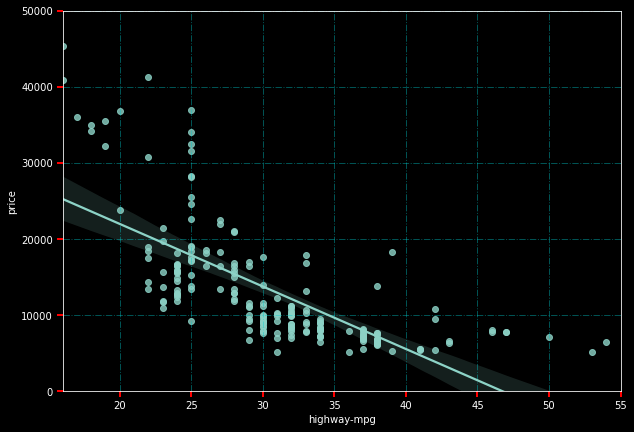

In [23]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='w', colors='r', grid_color='gray', grid_alpha=0.5)
plt.grid(b=True, which='major',color='DarkTurquoise', linestyle='-.', linewidth=1, alpha=0.4) # Grid shows the inline in the plot
plt.ylim(0,50000)
plt.xlim(16,55)

#### 2. Residual Plot
- The Residual plot represents the _error__ between the actual values and the predicted values.
- Examining the predicted values <span style='color: Blue; font-size:26px'>_$\hat{Y}_0$_</span> and the actual value <span style='color: gray; font-size:26px'>_${Y}_0$_</span>, we can see the difference.
    <center>
    <img src='modules_images/residual_02.png',  style='width: 522px;'>
    <img src='modules_images/residualplot.png',  style='width: 750px;'>
    </center>
---
##### Senario 01: Mean distribution in the Residual Plot
- We expect to see the results to have **zero mean data**. distributed evently around the x axis with similar variance. 
-There's no **curvature**.
- Look at the **spread of the residuals**:
    + Randomly spread out x-axis then <span style='color:green; font-size:20px'>**linear model is appropriate.**</span>
    <center>
    <img src='modules_images/residualplot_mean.png',  style='width: 750px;'>
    </center>
---
##### Senario 02: Mean distribution in the Residual Plot (Error)
- In this residual plot, there's a **curvature**.
- The values of the error change with _x_.
- *For example,* in this region, 
    + all the residual errors are positive, (left side)
    + on the down Mean there're negative errors. (middle side)
    + into the third position, the error is large. (right side)
    <center>
    <img src='modules_images/residualplot_mean_error.png',  style='width: 750px;'>
    </center>

- Not randomly spread out around the x-axis.
- This suggests the <span style='color:yellow; font-size:20px'>**linear assumption is incorrect**</span> (Which mean that the relationship between _y_ and _x_ is not resonable).
- Variance appears to change with x-axis.
---
##### Senario 03: Mean distribution in the Residual Plot (Error) (positive increase)
- In this plot we can see the variance of the residual increase with _x_. Therefore, <span style='color:red; font-size:20px'>**our model incorrect.**</span>
    <center>
    <img src='modules_images/residualplot_mean_error2.png',  style='width: 750px;'>
    </center>

/home/xavier/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


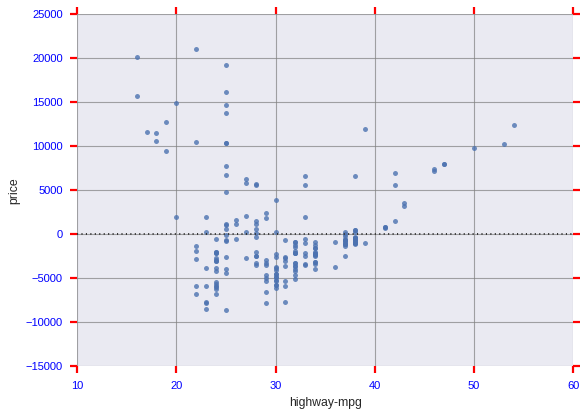

In [83]:
plt.style.use('seaborn')
sns.residplot(df['highway-mpg'], df['price'], line_kws={'color':'cyan','s':80})
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='b', colors='r', grid_color='gray', grid_alpha=0.7)
# plt.grid(b=True, which='major',color='DarkTurquoise', linestyle='-', linewidth=1, alpha=0.4) # Grid shows the inline in the plot
plt.show()
## linear assumption is incorrect while we're have curveture.

#### 3. Distribution Plots
**A Distriution plot counts the _predicted_ value versus the _actual_ value.**
- These plots are extremely useful for visualizing models with <u>*more than one independent variable or features.*</u>
    <center>
    <img src='modules_images/distubplot.png',  style='width: 750px;'>
    </center>
    
- The value of the target and the predicted value are continuous, therefore pandas will convert them into distribution.
    <center>
    <img src='modules_images/distributionplot.png',  style='width: 750px;'>
    </center>

**Example:**
- Compare the distribution plots:
    + The *actual values* Represents with <span style='color:red; font-size:20px'>**Red Line**</span>
    + The *fitted or trained values* that result the model --> Represents with <span style='color:blue; font-size:20px'>**Blue Line**</span>
    
    <div>
    <img src='modules_images/displot5.png',  style='width: 600px; height: 550px; float:left'>
    <img src='modules_images/displot4.png',  style='width: 715px; float:right'>
    </div>

- Th first plot has muliple variables (interdependent variables) to predict the target unlike the the right plot which only has (one interdependent variables).
- That's why the first plot has more accurate distribution aspects line.

/home/xavier/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/xavier/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


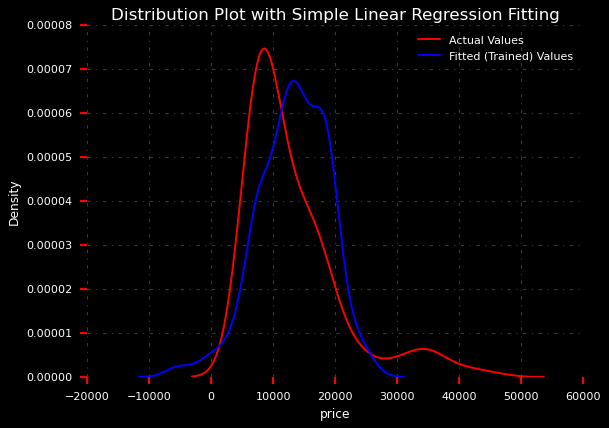

In [133]:
## Let's run the code of building distribution plot#
# The distribution will be for Simple Linear Regression.
plt.style.use('dark_background')
plt.title('Distribution Plot with Simple Linear Regression Fitting', fontsize=15)
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Values') # building the target distribution points
sns.distplot(Yhat, hist=False, color='b', label='Fitted (Trained) Values', ax=ax1) # Yhat can be simple linear regression or multiple linear regression

sns.axes_style("ticks")
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='w', colors='r', grid_color='gray', grid_alpha=0.5)
plt.grid(b=True, which='major',color='DarkTurquoise', linestyle='-.', linewidth=1, alpha=0.4) # Grid shows the inline in the plot
plt.legend()
plt.show()

/home/xavier/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/xavier/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


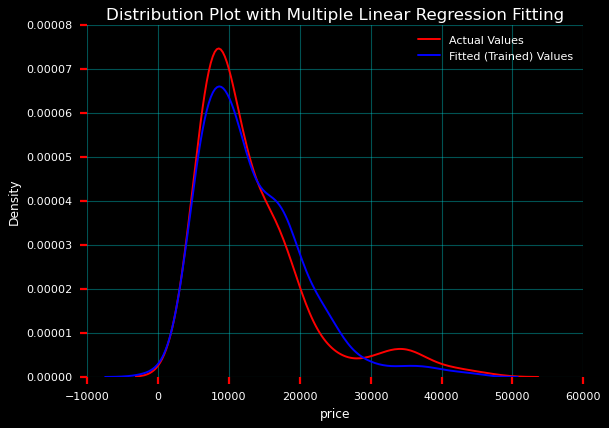

In [136]:
# For Multiple Linear Regression
plt.title('Distribution Plot with Multiple Linear Regression Fitting', fontsize=15)
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Values') # building the target distribution points
sns.distplot(Yhat, hist=False, color='b', label='Fitted (Trained) Values', ax=ax1) # Yhat can be simple linear regression or multiple linear regression
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='w', colors='r', grid_color='gray', grid_alpha=0.5)
plt.grid(b=True, which='major',color='DarkTurquoise', linestyle='-', linewidth=1, alpha=0.4) # Grid shows the inline in the plot
plt.legend()


### (C) Polynomial Regression and Pipelines
---

#### <span style='color:yellow; fontsize:24px; fontfamily:cambria;'><b>Polynomial Regression</span>

- It's a special case of the **general linear regression** model
- This method beneficial for describing curvilinear relationships.
<center>
    <img src='modules_images/polyReg.png'>
</center>

##### **What's a curvilinear relationship?**
- It's the visualization of the curving plot by <u>squaring</u> or <u>setting higer-order term</u> of the *predictor variables* in the model transforming the data.

##### **Types of Curvilinear Relationship**
1. **Quadratic - $2^{nd}$ order**:
    + $\hat{Y}$ = $b_0$ + $b_1$ $x_1$ + $b_2$ ($x_1)^2$    <img src='modules_images/polyReg2Degree.png'>
2. **Cubic - $3^{rd}$ order**:
    + $\hat{Y}$ = $b_0$ + $b_1$ $x_1$ + $b_2$ ($x_1)^2$ + $b_3 (x_1)^3$     <img src='modules_images/polyReg3Degree.png'>

3. **Higher order**:
    + $\hat{Y}$ = $b_0$ + $b_1$ $x_1$ + $b_2$ ($x_1)^2$ + $b_3 (x_1)^3$ + ...    <img src='modules_images/polyReghighDegree.png'>

In [137]:
## 1. Calcuate Polynomial of 3rd order (One dimensional)
x = np.array(df['horsepower'])
y = np.array(df['price'])
                     
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3          2
-0.002148 x + 0.9425 x + 34.94 x + 1481


##### **Polynomial Regression for <span style='color:green'><b>Multiple Dimensions</span>**
- We can also have multi dimensional polynomial linear regression
<center style='font-size:28px'> 
    $\hat{Y}$ = $b_0$ + $b_1$ $x_1$ + $b_2$ $x_2$ + $b_3 x_1 x_2$ + $b_4 (x_1)^2$ + $b_5 (x_2)^2 x_2$ + ...
</center>

- With complex formula like this, `numpy.polyfit()` cannot perform this type of regression.
- We use the **Pre-processing Library** in `sklearn` to create a polynomial feature object.

- **Simple Example**

    + The **"Pre-Processing** Library in scikit-learn,

        ```python
        from sklearn.preprocessing import polynomialFeatures   # Importing the library

        pr = PolynomailFeatures(degree=2, include_bias=False)  # Create a constructor object, and the formula dimension degree
        x_polly = pr.fit_transform(df[['horsepower', 'curb-weight']])  # Transform the given variales,and submit into t-he formula
        ```
    <br>

    + **The Transform Formula Algorithm**

        ```python
        pr = PolynomailFeatures(degree=2, include_bias=False)  # Create a constructor object, and the formula dimension degree
        ```


<div>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">$X_1$</th>
    <th class="tg-c3ow">$X_2$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-c3ow">2</td>
  </tr>
</tbody>
</table>
</div>    
    
 ```python
pr.fit_transform([[1,2]])  # Transform the given variales,and submit into the formula
```
<div>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">$X_1$</th>
    <th class="tg-c3ow">$X_2$</th>
    <th class="tg-c3ow">$X_1 X_2$</th>
    <th class="tg-c3ow">$X^{2}_{1}$</th>
    <th class="tg-c3ow">$X^{2}_{2}$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-c3ow">2</td>
    <td class="tg-c3ow">(1)2</td>
    <td class="tg-c3ow">1</td>
    <td class="tg-c3ow">(2)2</td>
  </tr>
</tbody>
</table>
    </div>

In [138]:
from sklearn.preprocessing import PolynomialFeatures   # Importing the library

pf = PolynomialFeatures(degree=2, include_bias=False)  # Create a constructor object, and the formula dimension degree
Z = df[['horsepower', 'curb-weight']] 

z_transf = pf.fit_transform(Z)  # Transform the given variales,and submit into t-he formula


Z.shape # Data shape before transforming

(201, 2)

In [139]:
z_transf.shape # after transforming

(201, 5)

##### **Pre-Processing <span style='color:cyan'><b>Normalization Complex Multiple Dimensions</span>**
- As the dimension of the data gets larger, we may want to *normalize* multiple features in `scikit-learn`.
    + For exmpale we need to Normalize the each feature simultaneously
    
    ```python
    from sklearn.preprocessing import StandardScaler   # Importing the library

    SCALE = StandardScaler()  # Create a constructor object, and the formula dimension degree
    SCALE.fit(df[['horsepower', 'highway-mpg']]) # Trainning the data for fitting the model.
    x_scale = SCALE.transform(df[['horsepower', 'curb-weight']])  # Transform the given variales,and submit into t-he formula
    ```

In [7]:
from sklearn.preprocessing import StandardScaler   # Importing the library

SCALE = StandardScaler()  # Create a constructor object, and the formula dimension degree
SCALE.fit(df[['horsepower', 'highway-mpg']], df['price']) # Trainning the data for fitting the model.
x_scale = SCALE.transform(df[['horsepower', 'curb-weight']])  # Transform the given variables,and submit into t-he formula
x_scale[0:5]

array([[ 2.16789442e-01,  3.70292494e+02],
       [ 2.16789442e-01,  3.70292494e+02],
       [ 1.35721011e+00,  4.10744523e+02],
       [-2.19032547e-02,  3.39254756e+02],
       [ 3.22875085e-01,  4.10891622e+02]])

#### <span style='color:yellow; fontsize:24px; fontfamily:cambria;'><b>Pipelines</span>
- Sequentially perform a series of transformations.
    <center>
    <img src='modules_images/piplines.png'  style='width: 750px;'>
    </center>
    
```python
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)),...
('mode', LinearRegression())]
```

In [142]:
### ----- Import all the libraries we need ----- ###
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [143]:
### ----- Implement sequance we mention in the picture ----- ###
# First element comtains the name of the estimator model.
# Second element contains the model constructor
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=3)), ('mode', LinearRegression())] 

# input the list in the pipeline constructor
pipe = Pipeline(Input)  # Now, we've pipeline object

# Train the pipeline by applying the train method
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']
pipe.fit(x, y)

# Let's produce the prediction
Yhatpipe = pipe.predict(x)
Yhatpipe[:5]

array([6853.00921003, 5623.67967976, 5640.37611161, 6033.08229464,
       5779.74599239])

/home/xavier/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/xavier/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


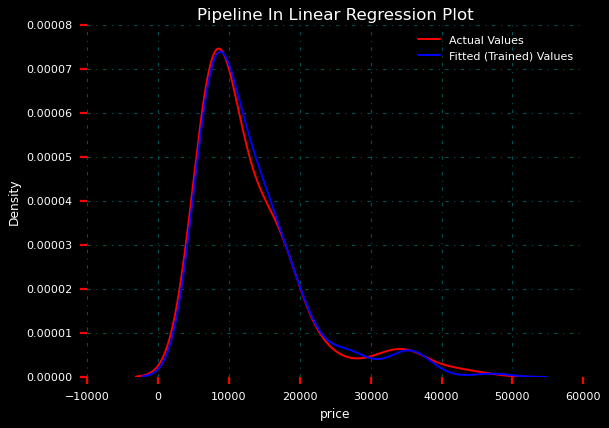

In [145]:
plt.title('Pipeline In Linear Regression Plot', fontsize=15)
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Values') # building the target distribution points
sns.distplot(Yhatpipe, hist=False, color='b', label='Fitted (Trained) Values', ax=ax1) # Yhat can be simple linear regression or multiple linear regression
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='w', colors='r', grid_color='gray', grid_alpha=0.5)
plt.grid(b=True, which='major',color='DarkTurquoise', linestyle='-.', linewidth=1, alpha=0.4) # Grid shows the inline in the plot
plt.legend()

### (D) Measures for In-Sample Evaluation
---
- These measures are a way to **numerically** determine how good the model fits on our data.
- Two important measures to determine the fit of a model:
    + **Mean Squared Error (MSE)**
    + **R-Squared (R^2)**

##### <span style='color:cyan'>**Mean squared Error (MSE)**</span>
<br>

- Its the difference between the **actual value `y`** and the **predicted value `Yhat`** then <u>**square**</u> it.
- Example for simple 01:
    <center>
    <img src='modules_images/Mean_squaredEx1.png'  style='width: 750px;'>
    </center>
    
+ Then **Square** the number:
    <center>
    <img src='modules_images/Mean_squaredEx1_2.png'  style='width: 780px;'>
    </center>
    <br><br>
    <center>
    <span style='font-size: 32px'>$\tfrac{\text{No.Mean of all the errors}}{\text{No. Of samples}}$</span>
    </center>

In [146]:
## In python, we can measure the MSE as follows
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  12421950.007215187


##### <span style='color:cyan'>**R-Squared / R^2**</span>
<br>

- The **coefficient of Determination** or **R-squared (R^2)**.

- Is a measure to determine <u>how close the data is to the fitted regression line.</u>

- R^2: the precentage of variation of the targer variable (Y) that is explained by the linear model. 

- Think about as comparing a <u>regression model</u> to a <u>simple model</u> i.e the mean of the data points.

- In this example ---> The average of the data points $\bar{y}$ is 6
<center>
    <img src='modules_images/r_2_1.png'>
</center>
<br>
<br>

**coefficient of Determination:**
 <img src='modules_images/r_2_2.png' style='width:550px; float:right'>
<center style='font-size:32px'>
    $R^2=(1-\tfrac{\text{MSE of regresssion line}}{\text{MSE of the average of the data}})$
</center>
<br>

- The <span style='color:blue; font-size:22px'>Blue Line</span> represents <u>the regression line</u>.
- The <span style='color: blue; font-size:22px'>Blue squares</span> represents the <u>MSE of the regression line</u>.
- The <span style='color:red; font-size:22px'>Red Line</span> represents the <u>average value of the data points</u> 
- The <span style='color:red; font-size:22px'>Red squares</span> represents <u> the MSE of the red line</u>
- We can see the area of the <span style='color:blue; font-size:22px'>Blue squares</span> is <u> **much smaller**</u> than the area of the <span style='color:red; font-size:22px'>Red squares</span>
<br>
- In this case <span style='color:cyan; font-size:18px'>the area of MSE is close to **zero**.</span>
<br>

<center style='font-size:25px'>
$\tfrac{\text{MSE of regresssion line}}{\text{MSE of the average of the data}} = \tfrac{\text{Blue Squares}}{\text{Red Squares}} = 0 $
</center>
<br>
<center style='font-size:25px'>
$R^2=(1-\tfrac{\text{MSE of regresssion line}}{\text{MSE of }{\bar{y}}})
= (1-0)
= 1$
</center>
<br>

**Which means the line is <span style='color:green; font-size:18px'><b>a good fit for the data.</span>**
<br>
<hr>
<br>
<img src='modules_images/r_2_3.png' style='float:right; width:550px'>

- Here is another example of a line <u>does not fit the data well.</u>  

- If we just examine the area of the <span style='color:red; font-size:22px'>Red squares</span> to the <span style='color:blue; font-size:22px'>Blue squares</span>, we will see the area is almost <u>**identical**</u>.
<br>

- In this case <span style='color:cyan; font-size:18px'>the area of MSE is close to **one**.<span>
<br>
    
<center style='font-size:20px'>
$\tfrac{\text{MSE of regresssion line}}{\text{MSE of the average of the data}} = \tfrac{\text{Blue Squares}}{\text{Red Squares}} = 1 $
</center>
<br>
    
<center style='font-size:20px'>
$R^2=(1-\tfrac{\text{MSE of regresssion line}}{\text{MSE of }{\bar{y}}})
= (1-1)
= 0$
</center>
<br>

**Which means the line is <span style='color:yellow; font-size:18px'><b>Not perform well.</b></span>**

##### Generally, the values of MSE are between <span style='color:white; font-size:18px'>**0**</span> and <span style='color:white; font-size:18px'>**1**</span>.

In [147]:
## We can calculate the R^2 as follow
X = df[['highway-mpg']]
Y = df['price']

lm.fit(X, Y)
lm.score(X, Y)

0.4965911884339177

From the value that we get from this example, we can say that **approximately 49.659%** of the variation of the `price` <u>explained by this simple linear model</u>

If we want to measure the fitting of the model for `pipline` data, we can do that by

In [148]:
pipe.score(x, y)

0.8941054524746311

From the value the we get from this example, we can say that **approximately 89.543%** of the variation of the `price` <u>explained by this Multiple linear model</u>

- If your R^2 is **Negitive**, it can be due to **Over fitting**.

### (E) Prediction and Decision Making
---
**Simply, how we can determine if our model is correct?**

<br>

#### Decision Making: Determining a Good Model Fit
1. Do the predicted values make sense.
2. Visualiation.
3. Numerical measures for evaluation.
4. Comparing Models.

##### <span style='color:cyan;'><b>Do the predicted values make sence</span>

In [149]:
## First we train the model
lm.fit(df[['highway-mpg']], df['price'])
## Let's predict the price of a car with 30 highway-mpg
yhat = lm.predict(np.array(30.0).reshape(-1,1))
print(f'Predicted values: {round(yhat[0],3)}')
print(f'Data Interception: {round(lm.intercept_,3)}')
print(f'Data Slope or coefficient: {round(lm.coef_[0],3)}')

Predicted values: 13771.305
Data Interception: 38423.306
Data Slope or coefficient: -821.733


If you recall the expression for the simple linear model that predicts the `price` from `highway-mpg`
<center style='font-size: 21px'>
    $\hat{Y} = b_0 + b_1 x_1$
    
    Price = 384323.31 + (-821.73) * df[['highway-mpg']]
</center>

- This value corresponds to the multiple of the highway-mpg.
- The value of the car decreases approximately **\$821**.
- **This value also seems reasonable.**

<br>
<br>

Sometimes, your model will produce values that don't make sence.
- For example, 
    + if we plot the model out for `highway-mpg` of range `0 to 100` we get negative values;
    <center>
    <img src='modules_images/decision_1.png'  style='width: 500px;'>
    </center>
    <br>
    <br>
    + This could be because the values in that range are **not realistic**.
    + The linear assumption is **incorrect** or we don't have data for cars in that range.

##### <span style='color:cyan;'><b>Visualization</span>
- Simply visualizing your data with a **regression**.

(16.0, 55.0)

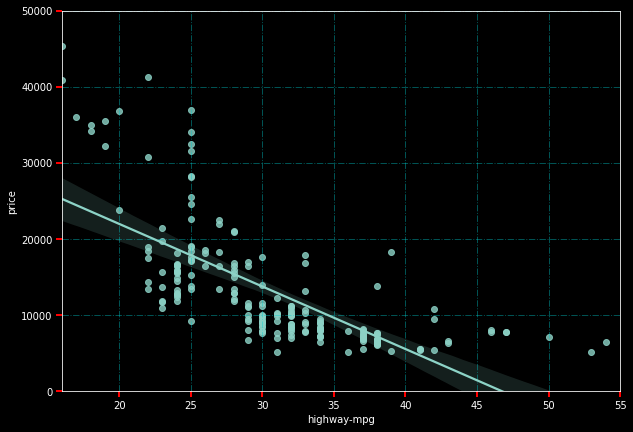

In [44]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='w', colors='r', grid_color='gray', grid_alpha=0.5)
plt.grid(b=True, which='major',color='DarkTurquoise', linestyle='-.', linewidth=1, alpha=0.4) # Grid shows the inline in the plot
plt.ylim(0,50000)
plt.xlim(16,55)

Using **Regression plot** to visualize your data is the first method you should try.

- Using **Residual plot**,
    + we can check the **curvature suggesting linear and non-linear behaviour**
<br>

- Using **Distribution plot**,
    + is a good method for **multiple linear regression**.

##### <span style='color:cyan;'><b>Numerical Measures for evaluation</span>
<br>

- The most intuitive numerical measure for determining if a model is **good** or **not**. 

<br>


<center>
<span style='color:green;'><b>The model appears to be a good fit.</span>
<br>    
<img src='modules_images/NMSE_1.png' style='width:850px'>
<br>
<br>
<span style='color:yellow;'><b>The Data is a lot messy but the linesr relation is evadent.</span>
<br>
<img src='modules_images/NMSE_2.png' style='width:850px'>
<br>
<br>
<span style='color:red;'><b>The model appears to be not fit.</span>
<br>
<img src='modules_images/NMSE_3.png' style='width:850px'>
</center>

##### <span style='color:cyan;'><b>Estimated Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</span>
<br>
    
<div style='font-size:21px'>
    
1. Is a lower MSE always implying a better fit?

- Not necessarily.
<br>
<br>
2. MSE for MLR model will be smaller than the MSE for an SLR model, since the errors of the data will decrease when more variables are included in the model.

<br>

3. Polynomial regression will also have smaller MSE than regular regression.
<br>

4. A similar inverse relationship holds for R^2.
</div>